In [1]:
!pip install psycopg2-binary
!pip install plotly


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Conexão ao PostgreSQL bem-sucedida
Nome: Palestra Técnica
Total de Horas: 43.2
-------------------
Nome: Seminário Técnico
Total de Horas: 80.0
-------------------


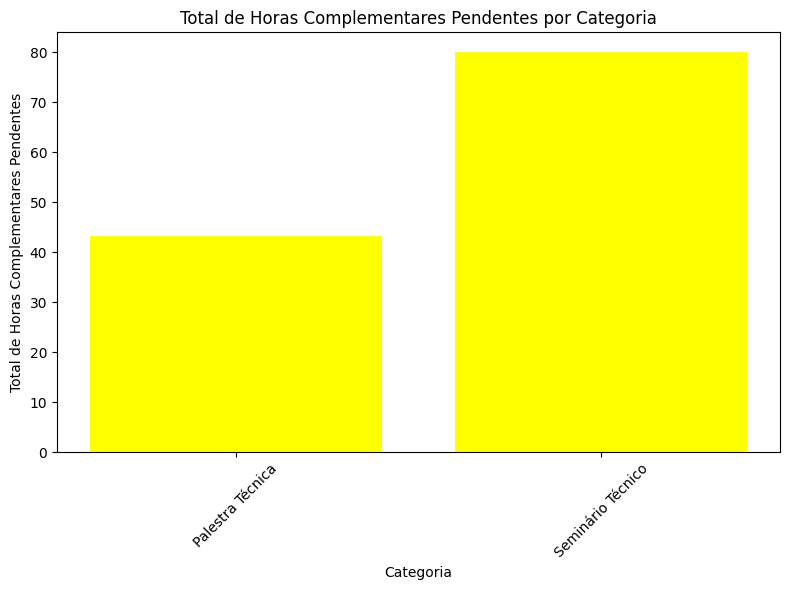

Nome: Congresso de Engenharia
Total de Horas: 35.0
-------------------
Nome: Curso Extracurricular
Total de Horas: 67.5
-------------------
Nome: Palestra Técnica
Total de Horas: 78.0
-------------------
Nome: Seminário Técnico
Total de Horas: 106.0
-------------------


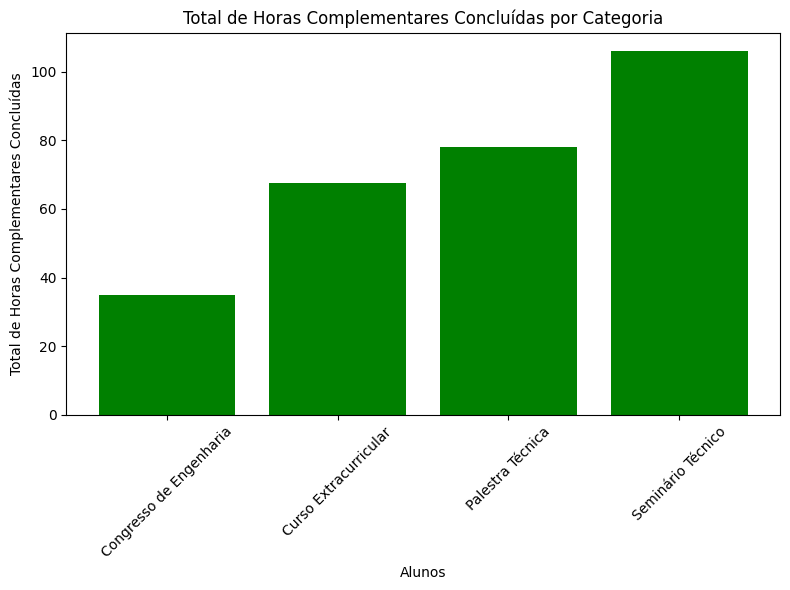

Nome: Congresso de Engenharia
Total de Horas: 40.0
-------------------
Nome: Curso Extracurricular
Total de Horas: 30.0
-------------------
Nome: Palestra Técnica
Total de Horas: 19.2
-------------------
Nome: Seminário Técnico
Total de Horas: 82.0
-------------------


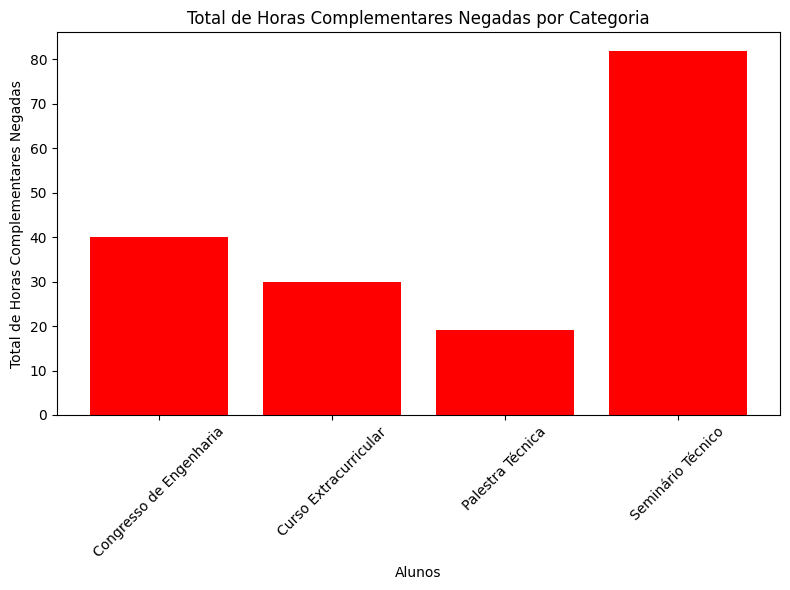

Nome: Beatriz Gonçalves
Total de Horas: 26.4
-------------------
Nome: Carla Costa
Total de Horas: 16.8
-------------------
Nome: Gabriel Lima
Total de Horas: 36.0
-------------------
Nome: Mariana Gonçalves
Total de Horas: 44.0
-------------------


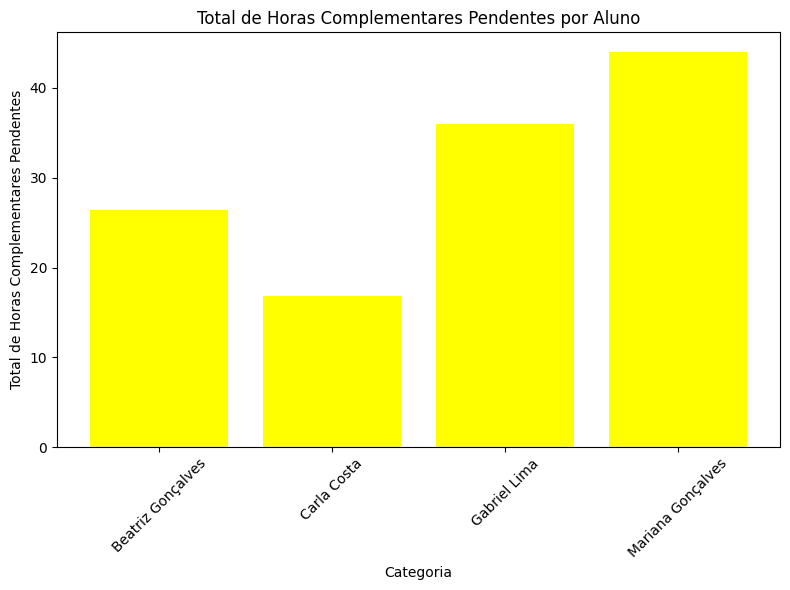

Nome: Ana Martins
Total de Horas: 27.0
-------------------
Nome: Ana Martins
Total de Horas: 16.8
-------------------
Nome: Beatriz Gonçalves
Total de Horas: 14.399999999999999
-------------------
Nome: João Santos
Total de Horas: 22.5
-------------------
Nome: Jorge Santos
Total de Horas: 40.0
-------------------
Nome: Julio Borges
Total de Horas: 24.0
-------------------
Nome: Leticia Alves
Total de Horas: 30.0
-------------------
Nome: Maria Fernanda
Total de Horas: 22.8
-------------------
Nome: Maria Silva
Total de Horas: 18.0
-------------------
Nome: Renan Pereira
Total de Horas: 36.0
-------------------
Nome: Roberto Melo
Total de Horas: 35.0
-------------------


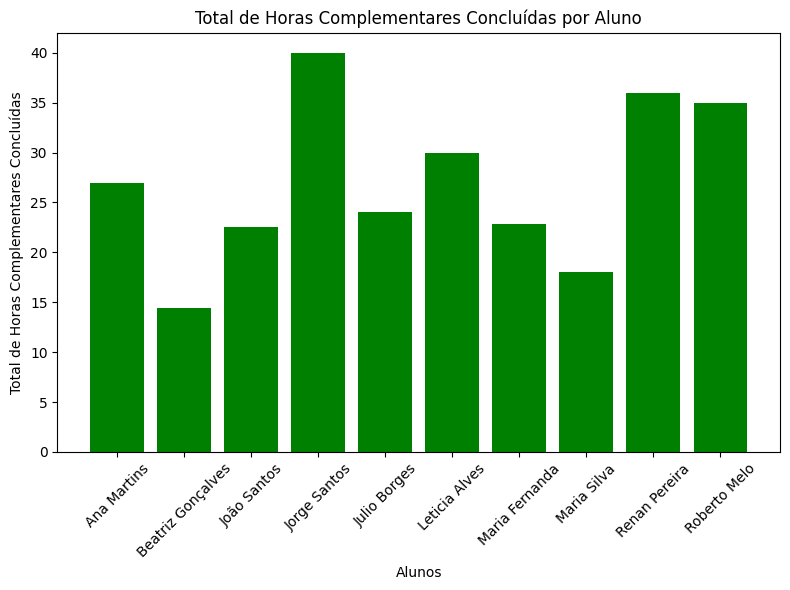

Nome: Beatriz Gonçalves
Total de Horas: 19.2
-------------------
Nome: Isabela Reis
Total de Horas: 40.0
-------------------
Nome: Lucas Oliveira
Total de Horas: 30.0
-------------------
Nome: Nathalia Martins
Total de Horas: 50.0
-------------------
Nome: Thais Souza
Total de Horas: 32.0
-------------------


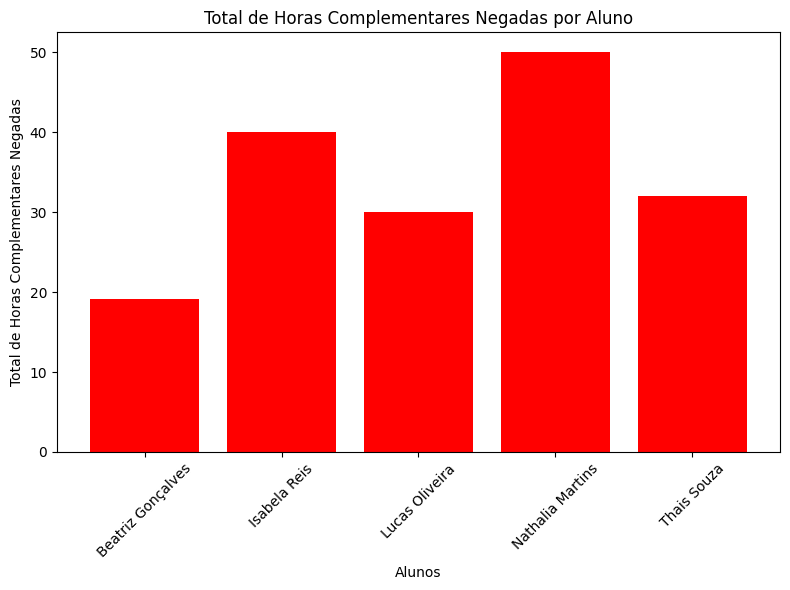

Conexão ao PostgreSQL fechada


In [2]:
import psycopg2
import matplotlib.pyplot as plt

# Conectar ao banco de dados PostgreSQL
try:
    conn = psycopg2.connect(
        dbname="godziny_bd",
        user="postgres",
        password="root",
        host="localhost",
        port="5432"
    )
    print("Conexão ao PostgreSQL bem-sucedida")
except psycopg2.Error as e:
    print("Erro ao conectar ao PostgreSQL:", e)
    conn = None

# Exemplo de consulta para recuperar dados
if conn:
    cursor = None
    try:
        # Abrir um cursor para executar operações no banco de dados
        cursor = conn.cursor()

        # Consulta SQL para recuperar a soma das horas complementares PENDENTES por categoria------------------------------------------------------------------------------------------------------------------------------
        query = """
        SELECT 
            ct.nome AS nome,
            a.status,
            SUM(a.carga_horaria * ct.horar_multiplicador) AS horas_totais
        FROM atividade a
        JOIN categoria AS ct ON ct.id = a.categoria_id
        WHERE a.status = 'Em Andamento'
        GROUP BY ct.nome, a.status
        ORDER BY ct.nome, a.status;
        """
        cursor.execute(query)

        # Recuperar todos os resultados da consulta
        resultados = cursor.fetchall()

        # Exibir os resultados
        for row in resultados:
            print("Nome:", row[0])
            print("Total de Horas:", row[2])
            print("-------------------")

        # Exemplo de criação de gráfico (matplotlib)
        nomes_alunos = [row[0] for row in resultados]
        horas_complementares = [float(row[2]) for row in resultados]

        plt.figure(figsize=(8, 6))
        plt.bar(nomes_alunos, horas_complementares, color='yellow')  # Corrigido
        plt.xlabel('Categoria')
        plt.ylabel('Total de Horas Complementares Pendentes')
        plt.title('Total de Horas Complementares Pendentes por Categoria')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # Consulta SQL para recuperar a soma das horas complementares CONCLUIDAS por categoria---------------------------------------------------------------------------------------------------------------------
        query = """
        SELECT 
            ct.nome AS nome,
            a.status,
            SUM(a.carga_horaria * ct.horar_multiplicador) AS horas_totais
        FROM atividade a
        JOIN categoria AS ct ON ct.id = a.categoria_id
        WHERE a.status = 'Concluída'
        GROUP BY ct.nome, a.status
        ORDER BY ct.nome, a.status;
        """
        cursor.execute(query)

        # Recuperar todos os resultados da consulta
        resultados = cursor.fetchall()

        # Exibir os resultados
        for row in resultados:
            print("Nome:", row[0])
            print("Total de Horas:", row[2])
            print("-------------------")

        # Exemplo de criação de gráfico (matplotlib)
        nomes_alunos = [row[0] for row in resultados]
        horas_complementares = [float(row[2]) for row in resultados]

        plt.figure(figsize=(8, 6))
        plt.bar(nomes_alunos, horas_complementares, color='green')  # Corrigido
        plt.xlabel('Alunos')
        plt.ylabel('Total de Horas Complementares Concluídas')
        plt.title('Total de Horas Complementares Concluídas por Categoria')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # Consulta SQL para recuperar a soma das horas complementares CONCLUIDAS por categoria -----------------------------------------------------------------------------------------------------------------
        query = """
        SELECT 
            ct.nome AS nome,
            a.status,
            SUM(a.carga_horaria * ct.horar_multiplicador) AS horas_totais
        FROM atividade a
        JOIN categoria AS ct ON ct.id = a.categoria_id
        WHERE a.status = 'Não Iniciado'
        GROUP BY ct.nome, a.status
        ORDER BY ct.nome, a.status;
        """
        cursor.execute(query)

        # Recuperar todos os resultados da consulta
        resultados = cursor.fetchall()

        # Exibir os resultados
        for row in resultados:
            print("Nome:", row[0])
            print("Total de Horas:", row[2])
            print("-------------------")

        # Exemplo de criação de gráfico (matplotlib)
        nomes_alunos = [row[0] for row in resultados]
        horas_complementares = [float(row[2]) for row in resultados]

        plt.figure(figsize=(8, 6))
        plt.bar(nomes_alunos, horas_complementares, color='red')  # Corrigido
        plt.xlabel('Alunos')
        plt.ylabel('Total de Horas Complementares Negadas')
        plt.title('Total de Horas Complementares Negadas por Categoria')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # Consulta SQL para recuperar a soma das horas complementares PENDENTES por categoria------------------------------------------------------------------------------------------------------------------------------
        query = """
        select 
            u.nome,
            a.titulo,
            sum(a.carga_horaria * ct.horar_multiplicador) as horas_totais
        from atividade a
        join usuario AS u ON u.matricula = a.usuario_id
        join categoria AS ct ON ct.id = a.categoria_id
        where a.status = 'Em Andamento'
        group by u.nome, a.titulo
        order by u.nome, a.titulo;
        """
        cursor.execute(query)

        # Recuperar todos os resultados da consulta
        resultados = cursor.fetchall()

        # Exibir os resultados
        for row in resultados:
            print("Nome:", row[0])
            print("Total de Horas:", row[2])
            print("-------------------")

        # Exemplo de criação de gráfico (matplotlib)
        nomes_alunos = [row[0] for row in resultados]
        horas_complementares = [float(row[2]) for row in resultados]

        plt.figure(figsize=(8, 6))
        plt.bar(nomes_alunos, horas_complementares, color='yellow')  # Corrigido
        plt.xlabel('Categoria')
        plt.ylabel('Total de Horas Complementares Pendentes')
        plt.title('Total de Horas Complementares Pendentes por Aluno')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # Consulta SQL para recuperar a soma das horas complementares CONCLUIDAS por categoria---------------------------------------------------------------------------------------------------------------------
        query = """
        select 
            u.nome,
            a.titulo,
            sum(a.carga_horaria * ct.horar_multiplicador) as horas_totais
        from atividade a
        join usuario AS u ON u.matricula = a.usuario_id
        join categoria AS ct ON ct.id = a.categoria_id
        where a.status = 'Concluída'
        group by u.nome, a.titulo
        order by u.nome, a.titulo;
        """
        cursor.execute(query)

        # Recuperar todos os resultados da consulta
        resultados = cursor.fetchall()

        # Exibir os resultados
        for row in resultados:
            print("Nome:", row[0])
            print("Total de Horas:", row[2])
            print("-------------------")

        # Exemplo de criação de gráfico (matplotlib)
        nomes_alunos = [row[0] for row in resultados]
        horas_complementares = [float(row[2]) for row in resultados]

        plt.figure(figsize=(8, 6))
        plt.bar(nomes_alunos, horas_complementares, color='green')  # Corrigido
        plt.xlabel('Alunos')
        plt.ylabel('Total de Horas Complementares Concluídas')
        plt.title('Total de Horas Complementares Concluídas por Aluno')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # Consulta SQL para recuperar a soma das horas complementares CONCLUIDAS por categoria -----------------------------------------------------------------------------------------------------------------
        query = """
        select 
            u.nome,
            a.titulo,
            sum(a.carga_horaria * ct.horar_multiplicador) as horas_totais
        from atividade a
        join usuario AS u ON u.matricula = a.usuario_id
        join categoria AS ct ON ct.id = a.categoria_id
        where a.status = 'Não Iniciado'
        group by u.nome, a.titulo
        order by u.nome, a.titulo;
        """
        cursor.execute(query)

        # Recuperar todos os resultados da consulta
        resultados = cursor.fetchall()

        # Exibir os resultados
        for row in resultados:
            print("Nome:", row[0])
            print("Total de Horas:", row[2])
            print("-------------------")

        # Exemplo de criação de gráfico (matplotlib)
        nomes_alunos = [row[0] for row in resultados]
        horas_complementares = [float(row[2]) for row in resultados]

        plt.figure(figsize=(8, 6))
        plt.bar(nomes_alunos, horas_complementares, color='red')  # Corrigido
        plt.xlabel('Alunos')
        plt.ylabel('Total de Horas Complementares Negadas')
        plt.title('Total de Horas Complementares Negadas por Aluno')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
    except psycopg2.Error as e:
        print("Erro ao executar a consulta SQL:", e)

    finally:
        # Fechar o cursor e a conexão com o banco de dados
        if cursor:
            cursor.close()
        if conn:
            conn.close()
        print("Conexão ao PostgreSQL fechada")
